In [46]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt  
%matplotlib inline 

from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import CountVectorizer,\
                                            TfidfVectorizer

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC

from sklearn.metrics import accuracy_score,\
                            precision_recall_fscore_support ,\
                            classification_report,\
                            confusion_matrix,\
                            ConfusionMatrixDisplay

In [3]:
df = pd.read_csv('./data/SMSSpamCollection', delimiter='\t', header=None, names=['labels','messages'])
df.head(4)

,labels,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...


In [4]:
df['labels'].value_counts()

labels
ham     4825
spam     747
Name: count, dtype: int64

Define input (X) and output(y)

In [5]:
X = df['messages']
y = df['labels']

Split into training set and test set

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=42, stratify=y)
# X_train, y_test = train_test_split(y, test_size=0.1, random_state=42, stratify=y)

Use bag-of-word model 

In [7]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train)
X_train_bow = vectorizer.transform(X_train)
X_test_bow = vectorizer.transform(X_test)
print(X_train_bow)

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 66831 stored elements and shape (5014, 8231)>
  Coords	Values
  (0, 3275)	1
  (0, 3636)	1
  (0, 6695)	1
  (0, 7244)	1
  (0, 7297)	1
  (0, 7851)	1
  (1, 1036)	1
  (1, 1242)	1
  (1, 1738)	1
  (1, 1896)	1
  (1, 2588)	1
  (1, 2771)	1
  (1, 4037)	1
  (1, 4620)	1
  (1, 5123)	1
  (1, 5318)	1
  (1, 5613)	1
  (1, 6320)	1
  (1, 6406)	1
  (1, 6579)	1
  (1, 6766)	1
  (1, 6967)	1
  (1, 7244)	2
  (1, 7248)	1
  (1, 7257)	1
  :	:
  (5012, 8047)	1
  (5012, 8189)	2
  (5013, 1006)	1
  (5013, 1057)	1
  (5013, 1127)	1
  (5013, 1199)	1
  (5013, 1706)	1
  (5013, 2365)	1
  (5013, 3025)	1
  (5013, 3461)	1
  (5013, 3813)	1
  (5013, 3876)	1
  (5013, 4153)	1
  (5013, 4351)	1
  (5013, 4901)	1
  (5013, 5103)	1
  (5013, 5250)	1
  (5013, 5276)	1
  (5013, 6304)	1
  (5013, 6497)	1
  (5013, 6905)	1
  (5013, 7261)	1
  (5013, 7282)	1
  (5013, 7291)	1
  (5013, 7876)	2


Gaussian Naive Bayes

In [21]:
gnb = GaussianNB().fit(X_train_bow.toarray(), y_train)
y_pred_gnb = gnb.predict(X_test_bow.toarray())

TypeError: Sparse data was passed for X, but dense data is required. Use '.toarray()' to convert to a dense numpy array.

In [9]:
def report_result(y_true, y_pred):
    print(f'Accuracy: {accuracy_score(y_true = y_true, y_pred=y_pred)}')
    print(classification_report(y_true=y_true, y_pred=y_pred))
    ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_true=y_true, y_pred=y_pred), display_labels=gnb.classes_).plot()
    plt.show()

Accuracy: 0.8888888888888888
              precision    recall  f1-score   support

         ham       0.98      0.89      0.93       483
        spam       0.56      0.87      0.68        75

    accuracy                           0.89       558
   macro avg       0.77      0.88      0.80       558
weighted avg       0.92      0.89      0.90       558



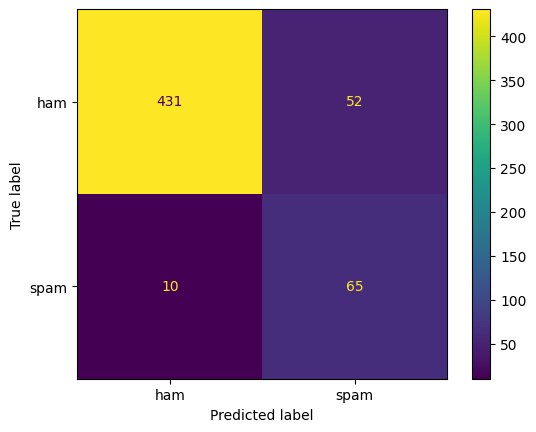

In [10]:
report_result(y_true=y_test, y_pred = y_pred_gnb)

Support vector machine

In [11]:
svc = SVC().fit(X_train_bow, y_train)
y_pred_svc = svc.predict(X_test_bow)

Accuracy: 0.974910394265233
              precision    recall  f1-score   support

         ham       0.97      1.00      0.99       483
        spam       0.98      0.83      0.90        75

    accuracy                           0.97       558
   macro avg       0.98      0.91      0.94       558
weighted avg       0.98      0.97      0.97       558



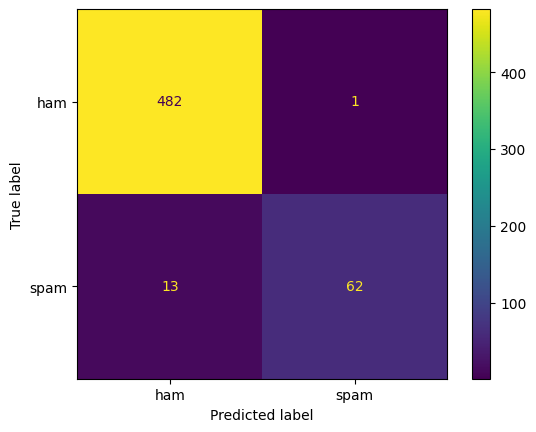

In [13]:
report_result(y_true=y_test, y_pred=y_pred_svc)

In [14]:
print(vectorizer.transform(iter("Last chance to save on coursera plus")).toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [16]:
svc.predict(vectorizer.transform(iter("Last chance to save on coursera plus")).toarray())

array(['ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham'],
      dtype=object)

In [36]:
input = vectorizer.transform(["Why do we need to sleep?"])
print(svc.predict(input))
print(svc.predict(X_test_bow[0]))

['ham']
['ham']


In [40]:
input.get_shape()

(1, 8231)

In [35]:
print(input)
print(X_test_bow[0])
print(X_test.iloc[0])

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 0 stored elements and shape (24, 8231)>
<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 17 stored elements and shape (1, 8231)>
  Coords	Values
  (0, 1036)	1
  (0, 1173)	1
  (0, 1440)	1
  (0, 1763)	2
  (0, 1819)	1
  (0, 3160)	1
  (0, 3501)	1
  (0, 3659)	2
  (0, 3864)	1
  (0, 4376)	1
  (0, 4547)	1
  (0, 4715)	1
  (0, 5318)	1
  (0, 6399)	1
  (0, 6473)	1
  (0, 6905)	1
  (0, 8189)	1
Or better still can you catch her and let ask her if she can sell  &lt;#&gt;  for me.


Use Tf-idf vectorizer

In [43]:
tfidf = TfidfVectorizer().fit(X_train)
X_train_tfidf = tfidf.transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

<class 'scipy.sparse._csr.csr_matrix'>


In [49]:
svc = SVC().fit(X_train_tfidf, y_train)
y_pred = svc.predict(X_test_tfidf)

Accuracy: 0.978494623655914
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       483
        spam       0.98      0.85      0.91        75

    accuracy                           0.98       558
   macro avg       0.98      0.93      0.95       558
weighted avg       0.98      0.98      0.98       558



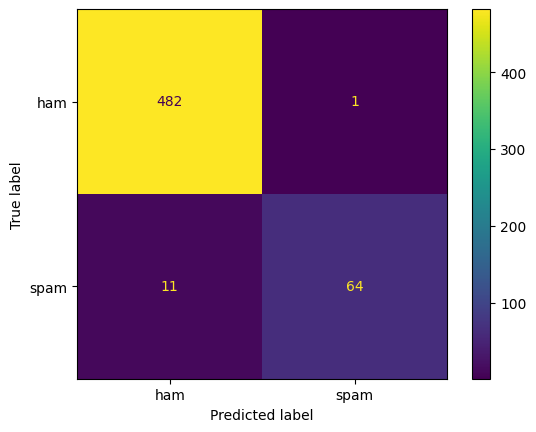

In [50]:
report_result(y_true=y_test, y_pred=y_pred)